In [52]:
import pandas as pd
import seaborn as sns

In [53]:
df = pd.read_csv("tp_class_scores.csv")
VOC_CLASS_NAMES = [
"aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
"chair", "cow", "diningtable", "dog", "horse", "motorbike", "person",
"pottedplant", "sheep", "sofa", "train", "tvmonitor"
]
df.head()[["class_id", "class_score"]]

,class_id,class_score
0,0,0.963
1,0,0.963
2,0,0.963
3,0,0.963
4,0,0.963


The threshold for each class for 95% true positive rate on the training data for classes[0:20]

In [54]:
new_df = df[["class_id", "class_score"]].groupby("class_id").quantile(0.05)
new_df["class_name"] = VOC_CLASS_NAMES
new_df.head()
#new_df.sort_values(by=['class_score'])

,class_score,class_name
class_id,,
0,0.8335,aeroplane
1,0.6076,bicycle
2,0.7952,bird
3,0.6362,boat
4,0.4621,bottle


In [57]:
new_df.to_dict()

{'class_score': {0: 0.8334999999999999,
  1: 0.6076,
  2: 0.7952,
  3: 0.6362000000000001,
  4: 0.4621,
  5: 0.728,
  6: 0.5685,
  7: 0.7866000000000001,
  8: 0.37135,
  9: 0.7074,
  10: 0.41009999999999996,
  11: 0.904,
  12: 0.7173,
  13: 0.6617500000000001,
  14: 0.488,
  15: 0.38,
  16: 0.6055,
  17: 0.49050000000000005,
  18: 0.8303999999999999,
  19: 0.6867},
 'class_name': {0: 'aeroplane',
  1: 'bicycle',
  2: 'bird',
  3: 'boat',
  4: 'bottle',
  5: 'bus',
  6: 'car',
  7: 'cat',
  8: 'chair',
  9: 'cow',
  10: 'diningtable',
  11: 'dog',
  12: 'horse',
  13: 'motorbike',
  14: 'person',
  15: 'pottedplant',
  16: 'sheep',
  17: 'sofa',
  18: 'train',
  19: 'tvmonitor'}}

Save this to a csv and use it in the task 1 unknown predictions

In [55]:
new_df.to_csv("dino_t1_class_thresholds.csv")

In [51]:
new_df["class_score"].median(), new_df["class_score"].std()

(0.6489750000000001, 0.15995809985907658)

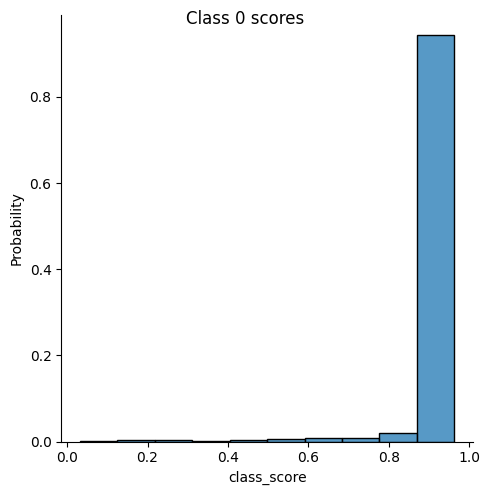

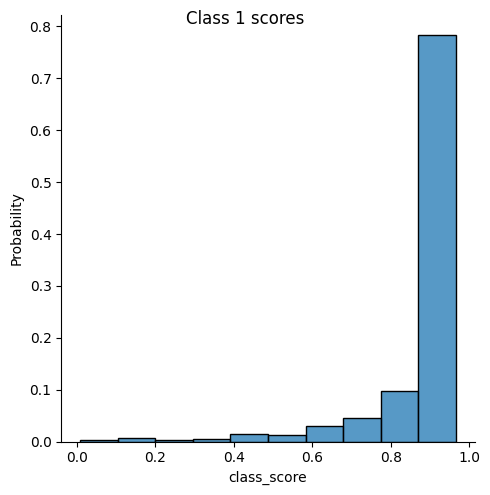

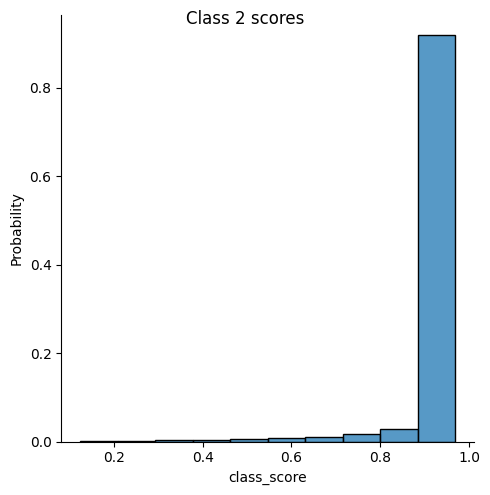

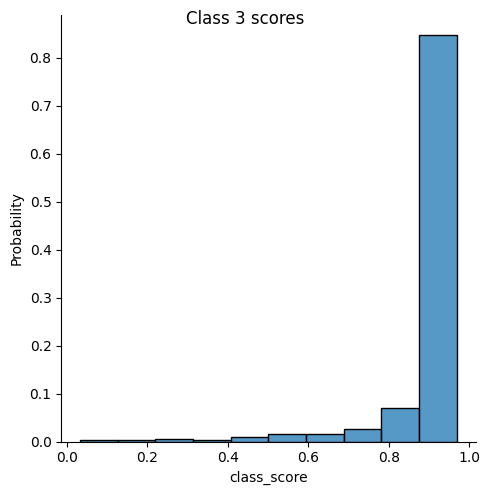

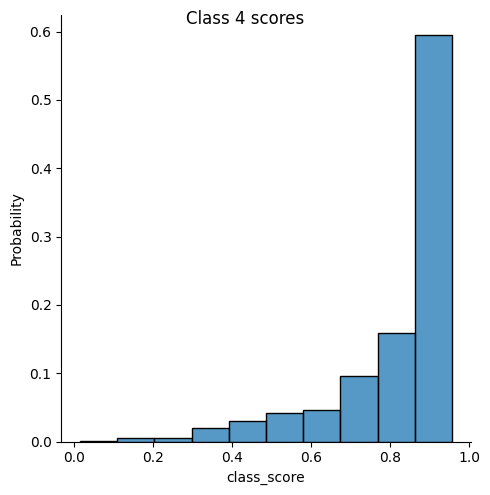

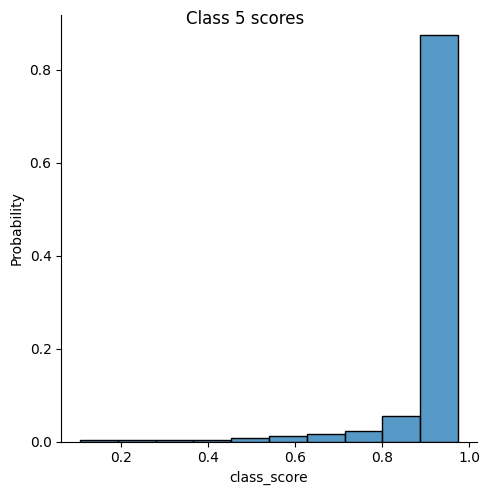

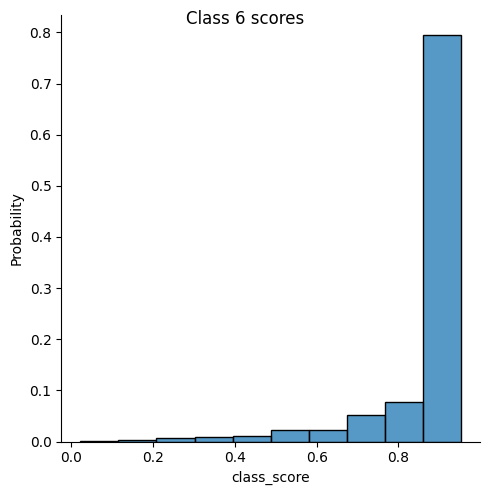

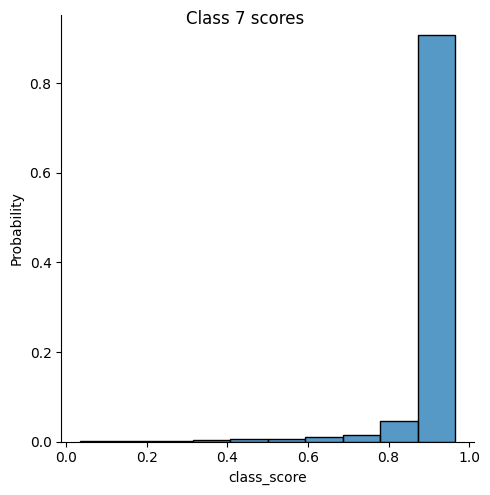

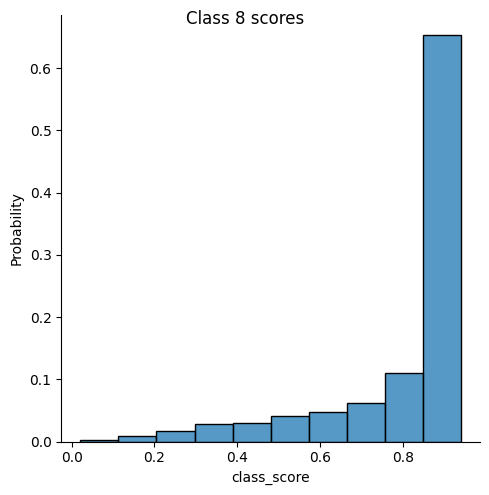

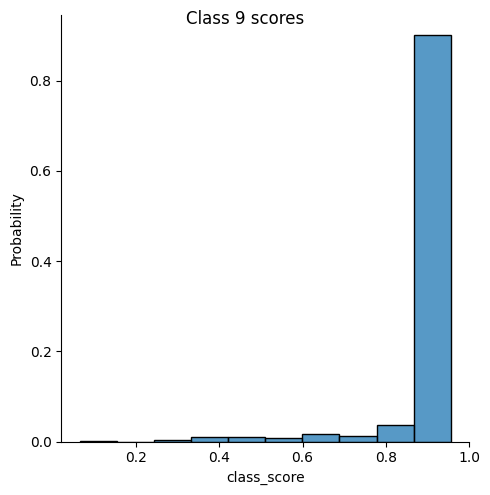

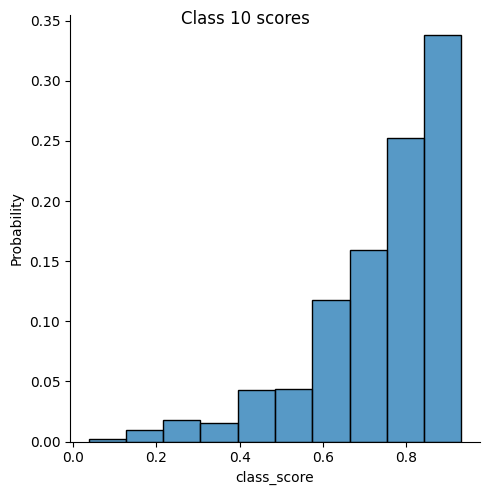

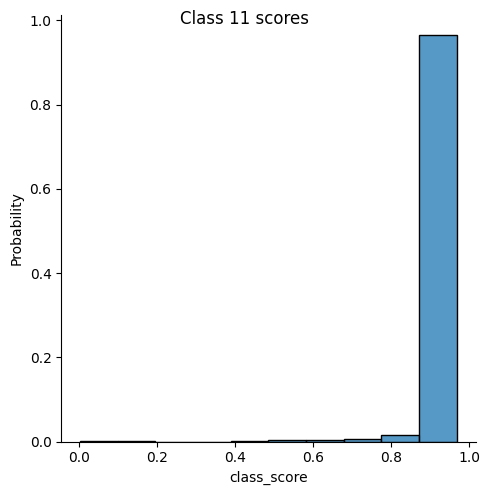

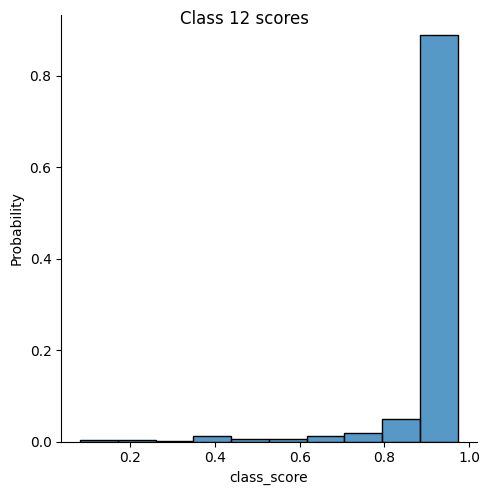

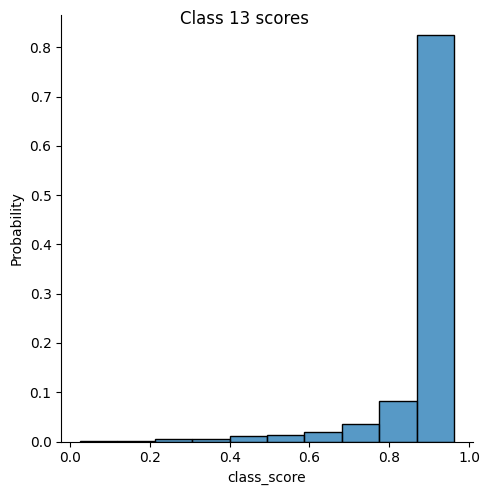

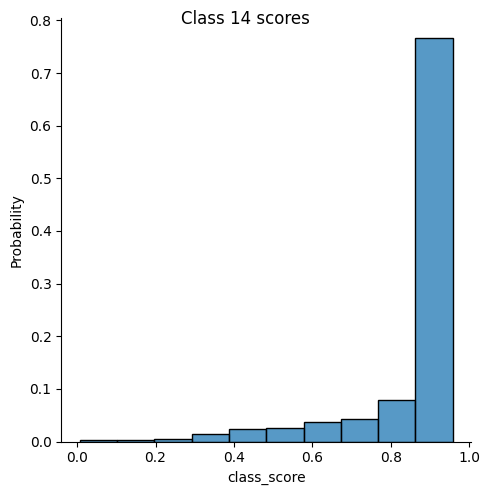

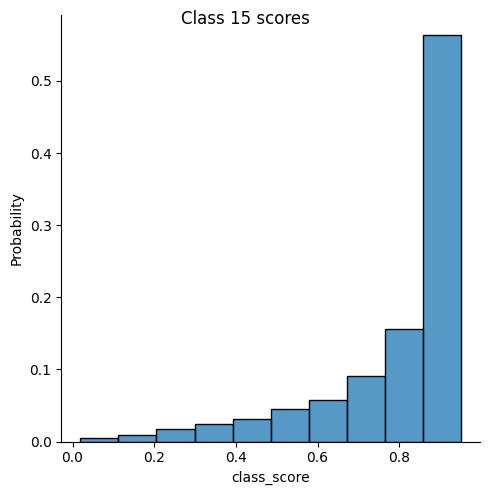

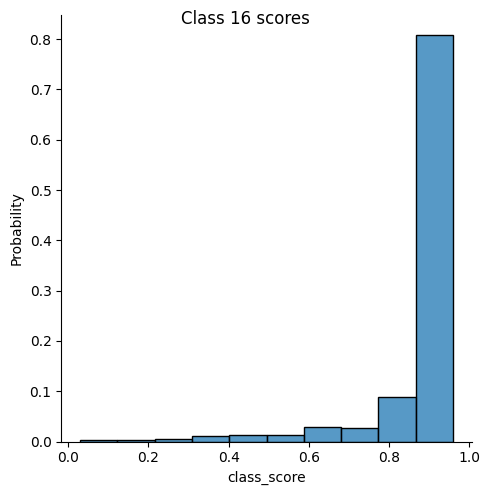

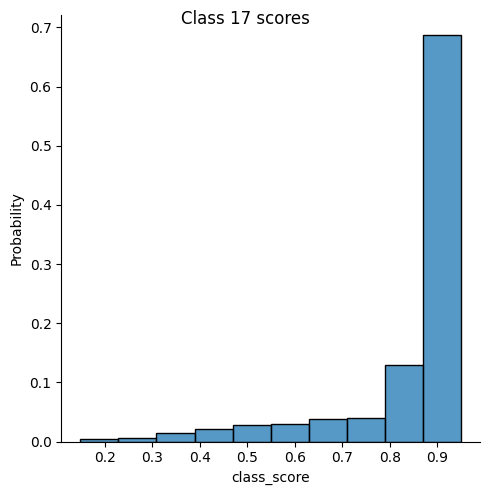

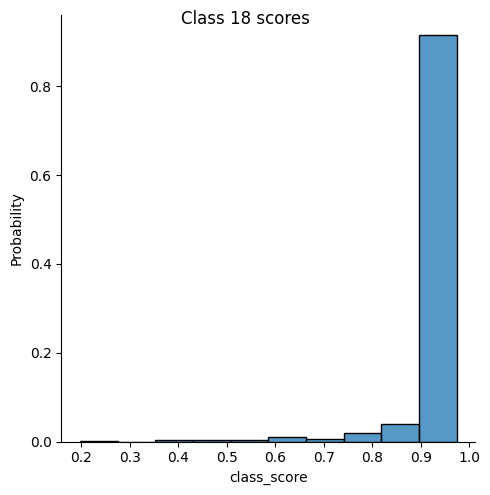

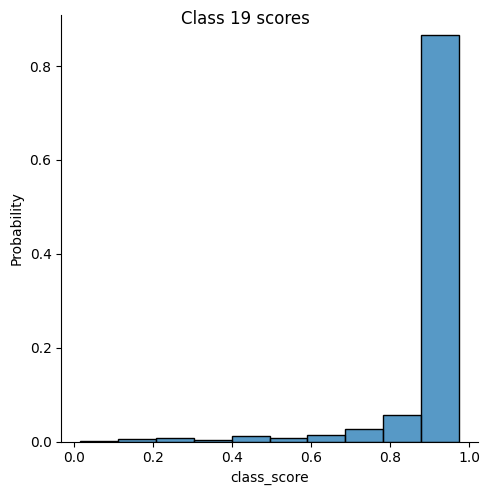

In [33]:
for id in range(0, 20):
    ax=sns.displot(data=df[df["class_id"]==id], x="class_score", bins=10, stat="probability")
    ax.fig.suptitle("Class {} scores".format(id),
                  fontsize=12, fontdict={"weight": "bold"})